## Import data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house_price_path = '/kaggle/input/home-data-for-ml-course/train.csv'
house_price = pd.read_csv(house_price_path, index_col='Id')

house_price_test_path = '/kaggle/input/home-data-for-ml-course/test.csv'
house_price_test = pd.read_csv(house_price_test_path, index_col='Id')

In [3]:
house_price.shape

(1460, 80)

In [4]:
data = house_price.copy()
data_test = house_price_test.copy()

In [5]:
list(data.columns.unique()) == list(data_test.columns.unique())

False

## Handling missing data

In [6]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

### Numeric data

In [7]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [8]:
# Match a column dtype = int64 and float64
numerical_cols = list(np.where((data.dtypes == np.int64) | (data.dtypes == np.float64))[0])
imp_mean.fit(data.iloc[:,numerical_cols])
data[data.columns[numerical_cols]] = imp_mean.transform(data.iloc[:,numerical_cols])
data.columns[numerical_cols]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
numerical_cols_test = list(np.where((data_test.dtypes == np.int64) | (data_test.dtypes == np.float64))[0])
imp_mean.fit(data_test.iloc[:,numerical_cols_test])
data_test[data_test.columns[numerical_cols_test]] = imp_mean.transform(data_test.iloc[:,numerical_cols_test])
data_test.columns[numerical_cols_test]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

### String data

In [10]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant')
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [11]:
# Match a column dtype = object
string_cols = list(np.where((data.dtypes == object))[0])
imp_mean.fit(data.iloc[:,string_cols])
data[data.columns[string_cols]] = imp_mean.transform(data.iloc[:,string_cols])
data.columns[string_cols]

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
string_cols_test = list(np.where((data_test.dtypes == object))[0])
imp_mean.fit(data_test.iloc[:,string_cols_test])
data_test[data_test.columns[string_cols_test]] = imp_mean.transform(data_test.iloc[:,string_cols_test])
data_test.columns[string_cols_test]

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Recheck the missing data

In [13]:
data[data[data.columns[-1]].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [14]:
data_test[data_test[data_test.columns[-1]].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,


In [15]:
string_cols_names = data.columns[string_cols].copy()
string_cols_names

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

## Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
def encoding(data, string_col_list, threshold=10):
    for col in string_col_list:
        length = len(data[col].unique())
        if length == 2 or length > threshold:
            print(f"Label encoding for column: {col}")
            label_encoder = LabelEncoder()
            data[col] = label_encoder.fit_transform(data[col])
        else:
            print(f"One-hot encoding for column: {col}")
            data = pd.get_dummies(data, columns=[col])

    return data

In [17]:
temp = encoding(data,string_cols_names)

One-hot encoding for column: MSZoning
Label encoding for column: Street
One-hot encoding for column: Alley
One-hot encoding for column: LotShape
One-hot encoding for column: LandContour
Label encoding for column: Utilities
One-hot encoding for column: LotConfig
One-hot encoding for column: LandSlope
Label encoding for column: Neighborhood
One-hot encoding for column: Condition1
One-hot encoding for column: Condition2
One-hot encoding for column: BldgType
One-hot encoding for column: HouseStyle
One-hot encoding for column: RoofStyle
One-hot encoding for column: RoofMatl
Label encoding for column: Exterior1st
Label encoding for column: Exterior2nd
One-hot encoding for column: MasVnrType
One-hot encoding for column: ExterQual
One-hot encoding for column: ExterCond
One-hot encoding for column: Foundation
One-hot encoding for column: BsmtQual
One-hot encoding for column: BsmtCond
One-hot encoding for column: BsmtExposure
One-hot encoding for column: BsmtFinType1
One-hot encoding for column:

In [18]:
temp.shape

(1460, 248)

In [19]:
temp_test = encoding(data_test,string_cols_names)

One-hot encoding for column: MSZoning
Label encoding for column: Street
One-hot encoding for column: Alley
One-hot encoding for column: LotShape
One-hot encoding for column: LandContour
Label encoding for column: Utilities
One-hot encoding for column: LotConfig
One-hot encoding for column: LandSlope
Label encoding for column: Neighborhood
One-hot encoding for column: Condition1
One-hot encoding for column: Condition2
One-hot encoding for column: BldgType
One-hot encoding for column: HouseStyle
One-hot encoding for column: RoofStyle
One-hot encoding for column: RoofMatl
Label encoding for column: Exterior1st
Label encoding for column: Exterior2nd
One-hot encoding for column: MasVnrType
One-hot encoding for column: ExterQual
One-hot encoding for column: ExterCond
One-hot encoding for column: Foundation
One-hot encoding for column: BsmtQual
One-hot encoding for column: BsmtCond
One-hot encoding for column: BsmtExposure
One-hot encoding for column: BsmtFinType1
One-hot encoding for column:

In [20]:
temp_test.shape

(1459, 236)

## Feature Selection

- ### Correlation

In [21]:
temp.corr()

,MSSubClass,LotFrontage,LotArea,Street,Utilities,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-3.570559e-01,-0.139781,-0.024969,-2.284384e-02,-0.005985,0.032628,-0.059316,0.027850,0.040581,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.357056,1.000000e+00,0.306795,-0.037323,-5.447825e-18,0.084545,0.234196,-0.052820,0.117598,0.082746,...,-0.051787,0.126580,-0.023461,-0.089928,-0.021846,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.139781,3.067946e-01,1.000000,-0.197131,1.012318e-02,0.044569,0.105806,-0.005636,0.014228,0.013788,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
Street,-0.024969,-3.732277e-02,-0.197131,1.000000,1.681767e-03,-0.011561,0.058823,0.042848,0.021137,0.065465,...,0.003766,0.019397,0.002915,0.006539,0.017512,0.003367,-0.112734,0.007571,-0.002140,0.019657
Utilities,-0.022844,-5.447825e-18,0.010123,0.001682,1.000000e+00,0.046809,-0.001881,0.009994,-0.011505,-0.034080,...,-0.001535,-0.007905,-0.001188,-0.067078,0.096033,-0.001372,-0.002383,-0.003085,-0.055982,-0.008011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.016241,-3.701951e-02,-0.013208,0.003367,-1.372213e-03,-0.045785,-0.041677,-0.038888,-0.045601,-0.040294,...,-0.003073,-0.015827,-0.002378,0.020457,-0.014289,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,0.030002,-1.808977e-02,0.008966,-0.112734,-2.383300e-03,0.018908,-0.044950,-0.033444,-0.010104,-0.020727,...,-0.005337,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.000983,1.581790e-02,-0.010781,0.007571,-3.085362e-03,-0.012769,-0.025515,-0.023873,-0.035785,-0.048056,...,-0.006909,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.024359,-7.207418e-02,0.005711,-0.002140,-5.598222e-02,-0.093272,-0.143282,0.161642,-0.158427,-0.120577,...,0.027414,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


<Axes: >

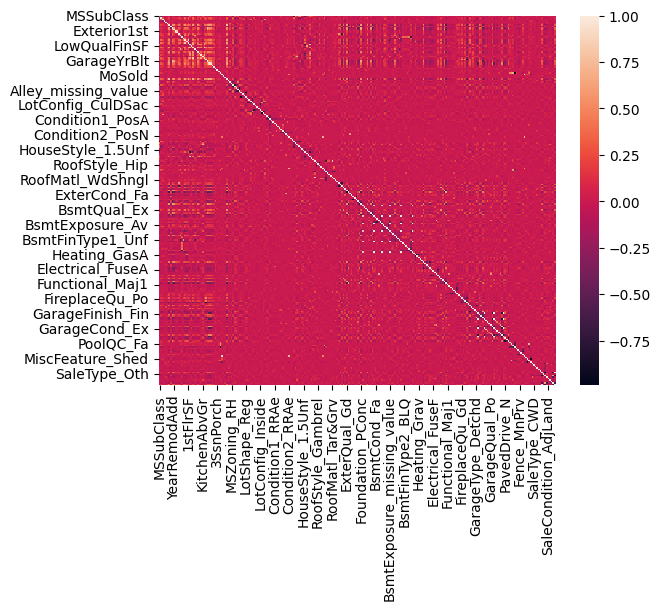

In [22]:
sns.heatmap(temp.corr())

In [23]:
temp_dict = temp.corrwith(temp['SalePrice']).to_dict()
temp_dict

{'MSSubClass': -0.08428413512659531,
 'LotFrontage': 0.3349008515405508,
 'LotArea': 0.2638433538714057,
 'Street': 0.04103553550004948,
 'Utilities': -0.014314296147248806,
 'Neighborhood': 0.21085146582230319,
 'OverallQual': 0.7909816005838044,
 'OverallCond': -0.07785589404867803,
 'YearBuilt': 0.5228973328794969,
 'YearRemodAdd': 0.5071009671113864,
 'Exterior1st': 0.10355101119090569,
 'Exterior2nd': 0.10376553702965834,
 'MasVnrArea': 0.47524131677366865,
 'BsmtFinSF1': 0.3864198062421532,
 'BsmtFinSF2': -0.011378121450215127,
 'BsmtUnfSF': 0.21447910554696892,
 'TotalBsmtSF': 0.6135805515591956,
 'CentralAir': 0.25132816384015527,
 '1stFlrSF': 0.6058521846919147,
 '2ndFlrSF': 0.3193338028320681,
 'LowQualFinSF': -0.025606130000679593,
 'GrLivArea': 0.7086244776126523,
 'BsmtFullBath': 0.2271222331314938,
 'BsmtHalfBath': -0.016844154297359016,
 'FullBath': 0.5606637627484449,
 'HalfBath': 0.2841076755947831,
 'BedroomAbvGr': 0.16821315430073985,
 'KitchenAbvGr': -0.135907370842

In [24]:
# If select very high correlation will high rate to encouter to multicolinear feature
# If drop very low correlation will increasing efficiency of training

# fair_corr = { column:value for column,value in temp_dict.items() if value >0.5}
fair_corr = {column: value for column, value in temp_dict.items() if 0.5 <= value <= 0.7 or -0.7 <= value <= -0.5}
if fair_corr.keys() == 'SalePrice':
    del fair_corr['SalePrice']

In [25]:
fair_corr

{'YearBuilt': 0.5228973328794969,
 'YearRemodAdd': 0.5071009671113864,
 'TotalBsmtSF': 0.6135805515591956,
 '1stFlrSF': 0.6058521846919147,
 'FullBath': 0.5606637627484449,
 'TotRmsAbvGrd': 0.5337231555820282,
 'GarageCars': 0.6404091972583529,
 'GarageArea': 0.6234314389183618,
 'ExterQual_TA': -0.5890435234097592,
 'BsmtQual_Ex': 0.553104847008938,
 'KitchenQual_Ex': 0.5040936759052961,
 'KitchenQual_TA': -0.5192978536548852}

In [26]:
len(fair_corr)

12

In [27]:
col_selected = list(fair_corr.keys())

- ### Mutal information

In [28]:
discrete_features = temp.dtypes == int

In [29]:
temp_y = data.SalePrice.copy()

In [30]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [31]:
mi_scores = make_mi_scores(temp, temp_y, discrete_features)
mi_scores = mi_scores.drop('SalePrice', axis=0)
mi_scores

OverallQual         0.563756
Neighborhood        0.523619
GrLivArea           0.483111
TotalBsmtSF         0.367462
GarageArea          0.364779
                      ...   
BsmtFinType2_LwQ    0.000000
BsmtFinType2_GLQ    0.000000
BsmtFinType2_BLQ    0.000000
BsmtExposure_Mn     0.000000
Heating_Grav        0.000000
Name: MI Scores, Length: 247, dtype: float64

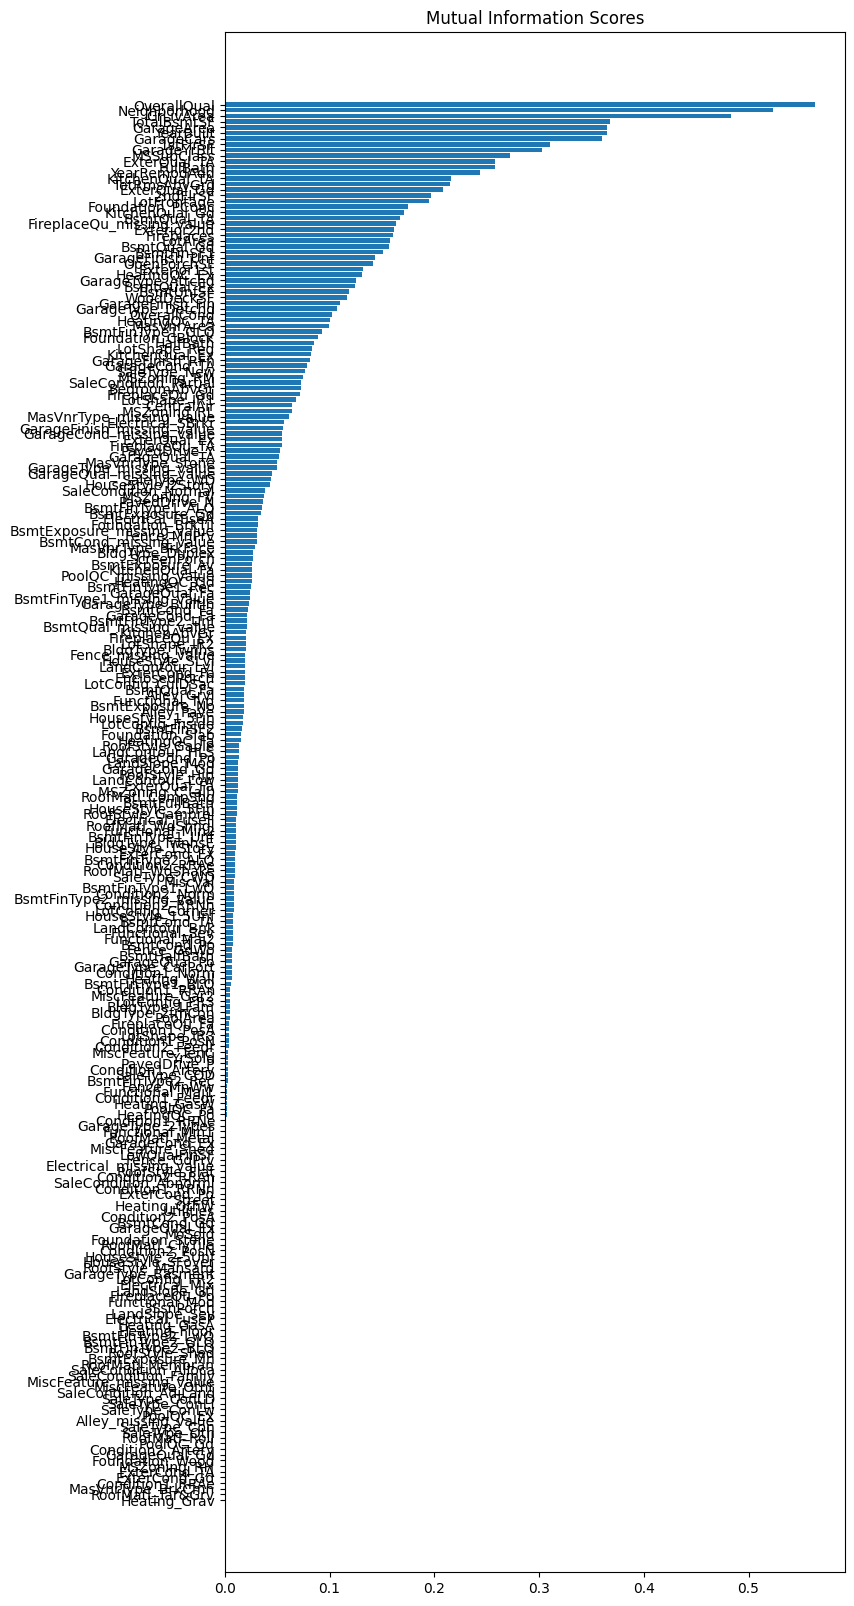

In [32]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 20))
plot_mi_scores(mi_scores)

In [33]:
# Calculate a threshold value, for example, the top 20% of features
# threshold_percentile = 0.8
# Upper threshold for soimtimes very high mutal information will may be very high correlation

Lower_threshold_percentile = 0.85  # top 15% of features 
Upper_threshold_percentile = 0.985  # top 1.5% of features 
Lower_threshold_value = np.percentile(mi_scores, 100*Lower_threshold_percentile )
Upper_threshold_value = np.percentile(mi_scores, 100*Upper_threshold_percentile)

print(f"Lower threshold Value: {Lower_threshold_value}")
print(f"Upper threshold Value: {Upper_threshold_value}")

Lower threshold Value: 0.10254745239973456
Upper threshold Value: 0.3656107171260428


In [34]:
score = mi_scores.to_dict()
selected = {cols:values for cols,values in score.items() if values>Lower_threshold_value and values<Upper_threshold_value}
selected

{'GarageArea': 0.3647790796896473,
 'YearBuilt': 0.3646130654773443,
 'GarageCars': 0.36002711818533917,
 '1stFlrSF': 0.3105499001121972,
 'GarageYrBlt': 0.3023878969250724,
 'MSSubClass': 0.27211577898197836,
 'ExterQual_TA': 0.25803503355000723,
 'FullBath': 0.257942112244157,
 'YearRemodAdd': 0.24357076876768913,
 'KitchenQual_TA': 0.21582921468269323,
 'TotRmsAbvGrd': 0.21538076053899857,
 'ExterQual_Gd': 0.20869513209270996,
 '2ndFlrSF': 0.196550894326474,
 'LotFrontage': 0.19495623876841117,
 'Foundation_PConc': 0.17523259020302473,
 'KitchenQual_Gd': 0.17070144641180418,
 'BsmtQual_TA': 0.16716905962017714,
 'FireplaceQu_missing_value': 0.1635206013574697,
 'Exterior2nd': 0.16117867184400447,
 'Fireplaces': 0.16069994380699648,
 'LotArea': 0.15787595543202304,
 'BsmtQual_Gd': 0.1564244655038347,
 'BsmtFinSF1': 0.15077939640947147,
 'GarageFinish_Unf': 0.14318660385931303,
 'OpenPorchSF': 0.1413787471745782,
 'Exterior1st': 0.13178050453447554,
 'HeatingQC_Ex': 0.1308019347398821

In [35]:
len(selected)

33

In [36]:
mutual_feature = selected.keys()

In [37]:
mutual_feature 

dict_keys(['GarageArea', 'YearBuilt', 'GarageCars', '1stFlrSF', 'GarageYrBlt', 'MSSubClass', 'ExterQual_TA', 'FullBath', 'YearRemodAdd', 'KitchenQual_TA', 'TotRmsAbvGrd', 'ExterQual_Gd', '2ndFlrSF', 'LotFrontage', 'Foundation_PConc', 'KitchenQual_Gd', 'BsmtQual_TA', 'FireplaceQu_missing_value', 'Exterior2nd', 'Fireplaces', 'LotArea', 'BsmtQual_Gd', 'BsmtFinSF1', 'GarageFinish_Unf', 'OpenPorchSF', 'Exterior1st', 'HeatingQC_Ex', 'GarageType_Attchd', 'BsmtQual_Ex', 'BsmtUnfSF', 'WoodDeckSF', 'GarageFinish_Fin', 'GarageType_Detchd'])

- ### Combine correlation and mutal information of feature selection

In [38]:
combine_feature = list(set(col_selected).union(set(mutual_feature)))

In [39]:
combine_feature 

['GarageFinish_Unf',
 'LotArea',
 'GarageCars',
 'Exterior1st',
 'KitchenQual_Gd',
 'Fireplaces',
 'LotFrontage',
 'GarageArea',
 'BsmtFinSF1',
 'MSSubClass',
 'BsmtQual_Gd',
 'BsmtQual_Ex',
 'TotalBsmtSF',
 'GarageType_Detchd',
 'TotRmsAbvGrd',
 'ExterQual_TA',
 'Foundation_PConc',
 'Exterior2nd',
 'FullBath',
 'ExterQual_Gd',
 'WoodDeckSF',
 'KitchenQual_Ex',
 'KitchenQual_TA',
 'FireplaceQu_missing_value',
 'HeatingQC_Ex',
 'GarageFinish_Fin',
 'BsmtUnfSF',
 '2ndFlrSF',
 'GarageType_Attchd',
 'GarageYrBlt',
 '1stFlrSF',
 'YearRemodAdd',
 'BsmtQual_TA',
 'YearBuilt',
 'OpenPorchSF']

In [40]:
len(combine_feature)

35

In [41]:
X = temp[combine_feature].copy()
y = data['SalePrice'].copy()
X_test = temp_test[combine_feature].copy()

In [42]:
del temp, temp_test, temp_y

## Generalize the data (Train test Split)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.2, random_state=0)

## Model: XGBoost and Evalaute: R2, MAE

In [44]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [45]:
import xgboost as xgb

model = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=10,
    learning_rate=0.3
)

model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Test model

In [46]:
y_pred = model.predict(X_validate)

R2 = r2_score(y_validate, y_pred)
MAE = mean_absolute_error(y_validate, y_pred)

print(f'R2 score: {R2}\nMean absolute error: {MAE}')

R2 score: 0.8372092297163282
Mean absolute error: 21544.38110017123


### Evaluate model

In [47]:
# Fill in the line below: get test predictions
y_pred_test = model.predict(X_test)

# R2 = r2_score(y_test, y_pred_test)
# MAE = mean_absolute_error(y_test, y_pred_test)

# print(f'R2 score: {R2}\nMean absolute error: {MAE}')

In [48]:
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': y_pred_test})
output.to_csv('submission.csv', index=False)